In [12]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [8]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [9]:
df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
126,-0.089063,-0.044642,-0.061174,-0.026328,-0.055231,-0.054549,0.041277,-0.076395,-0.093937,-0.054925,99.0
427,-0.034575,0.050680,0.005650,-0.005670,-0.073119,-0.062691,-0.006584,-0.039493,-0.045424,0.032059,67.0
131,-0.096328,-0.044642,-0.069797,-0.067642,-0.019456,-0.010708,0.015505,-0.039493,-0.046883,-0.079778,158.0
100,0.016281,-0.044642,0.017506,-0.022885,0.060349,0.044406,0.030232,-0.002592,0.037236,-0.001078,128.0
279,0.038076,0.050680,-0.024529,0.004658,-0.026336,-0.026366,0.015505,-0.039493,-0.015999,-0.025930,200.0


In [10]:
df.shape

(442, 11)

In [13]:
X_train,X_test, y_train,y_test = train_test_split(data.data, data.target,test_size=0.2,random_state=2)

In [14]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    
    

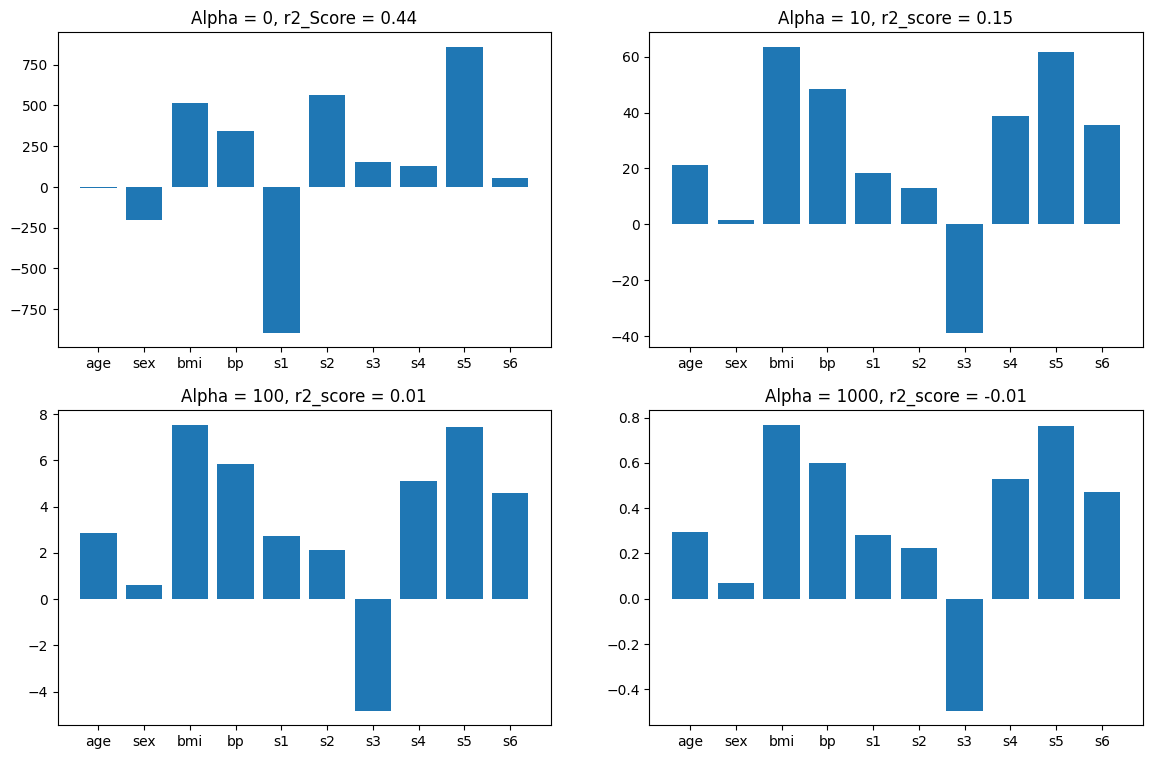

In [17]:
plt.figure(figsize=(14,9))

plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('Alpha = 0, r2_Score = {}'.format(round(r2_scores[0],2)))


plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10, r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('Alpha = 100, r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title(f'Alpha = 1000, r2_score = {round(r2_scores[3],2)}')

plt.show()

In [30]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    


coef_df = pd.DataFrame(coefs, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')
print(coef_df)

         age         sex         bmi          bp          s1          s2  \
0  -9.158653 -205.454322  516.693745  340.619999 -895.552002  561.220679   
1  -9.116119 -205.329219  516.889664  340.549436 -883.423872  551.559582   
2  -8.761487 -204.313404  518.380608  339.967926 -787.700510  475.282181   
3  -6.399507 -198.662945  522.056516  336.340595 -383.717571  152.670882   
4   6.643733 -172.237474  485.529585  314.675846  -72.940209  -80.588688   
5  42.242528  -57.304483  282.172125  198.059395   14.363734  -22.551079   
6  21.174024    1.659837   63.659826   48.492858   18.421510   12.875466   
7   2.858980    0.629453    7.540605    5.849949    2.710879    2.142135   
8   0.295726    0.069290    0.769004    0.597824    0.282900    0.225936   
9   0.029674    0.006995    0.077054    0.059914    0.028412    0.022715   

           s3          s4          s5         s6       alpha  
0  153.893110  126.731397  861.127002  52.421122      0.0000  
1  148.587063  125.353015  856.485935

[[  -9.15865318   -9.11611927   -8.95264833   -8.76148719   -7.54973811
     6.64373321   32.98691016   42.24252786   32.15601075   21.17402443]
 [-205.45432163 -205.32921903 -204.85489009 -204.31340446 -201.20302014
  -172.23747375  -99.63712406  -57.30448273   -2.56175965    1.65983694]
 [ 516.69374454  516.88966361  517.60886178  518.38060848  521.51859779
   485.52958514  363.41789029  282.1721254   109.75754328   63.65982584]
 [ 340.61999905  340.54943644  340.27987257  339.96792595  338.06565078
   314.67584612  247.23913192  198.0593951    82.25851871   48.49285813]
 [-895.5520019  -883.42387206 -838.09138818 -787.7005103  -534.14911525
   -72.94020918   -5.37159656   14.36373444   25.5137752    18.42151032]
 [ 561.22067904  551.55958217  515.44217307  475.28218117  272.95146134
   -80.58868817  -54.58724938  -22.55107873   14.84844432   12.87546578]
 [ 153.89310954  148.58706324  128.77492639  106.79525299   -2.72671995
  -174.46352722 -159.83203241 -136.92968398  -64.24007436 

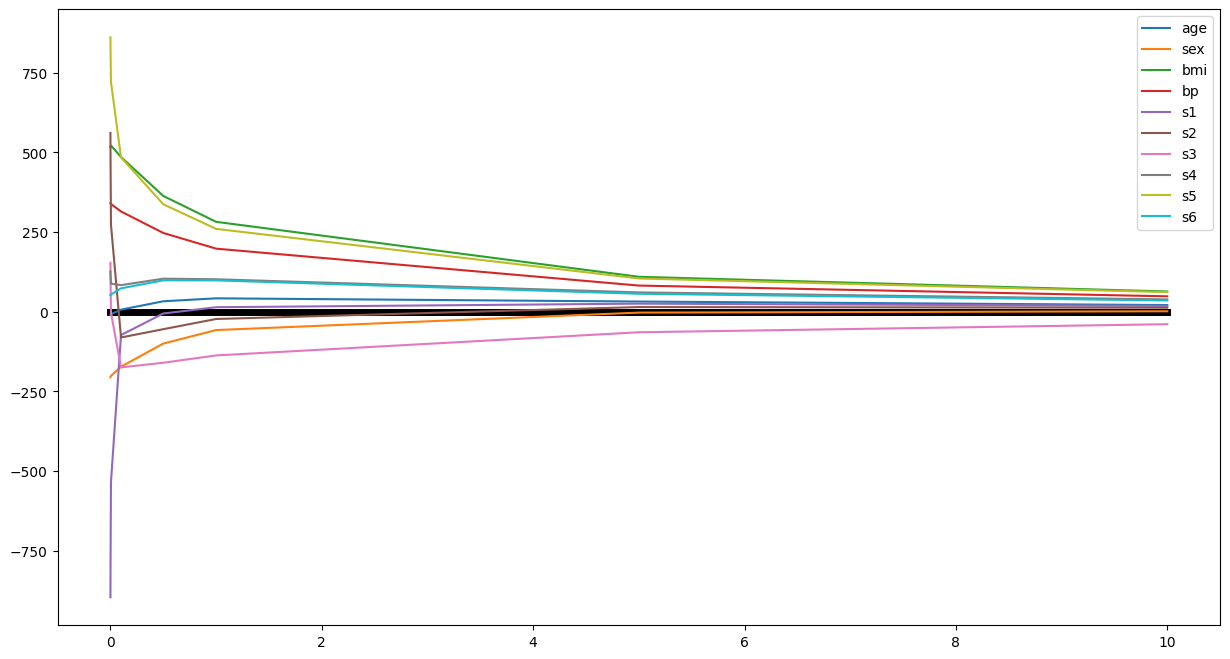

In [ ]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i], label=data.feature_names[i])
    
plt.legend()

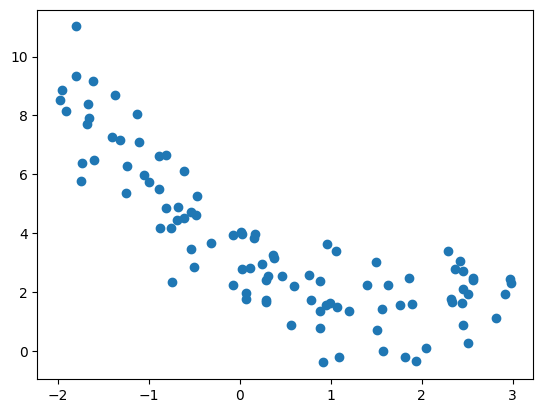

In [39]:
m = 100
X = 5 * np.random.rand(m,1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m,1)

plt.scatter(X,y)
plt.show()

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)


In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)

X_test = poly.transform(X_test)

In [61]:
from mlxtend.evaluate import bias_variance_decomp
alphas = np.linspace(0,100,100)

loss, bias, variance = [], [], []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias , avg_var = bias_variance_decomp(
        reg, X_train,y_train,X_test, y_test,
        loss='mse',
        random_seed=123
    )
    
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

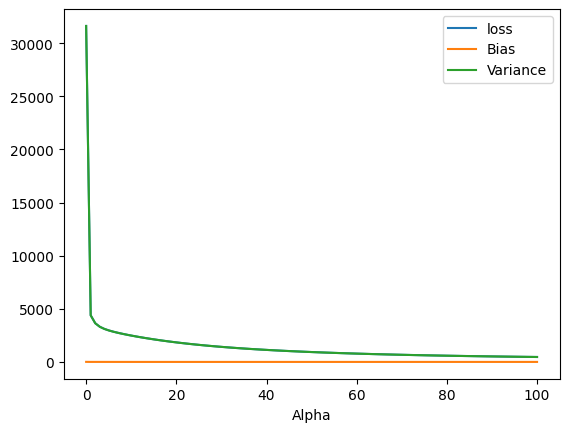

In [62]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
# plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()


[27.82809103]
-2.29474455867698


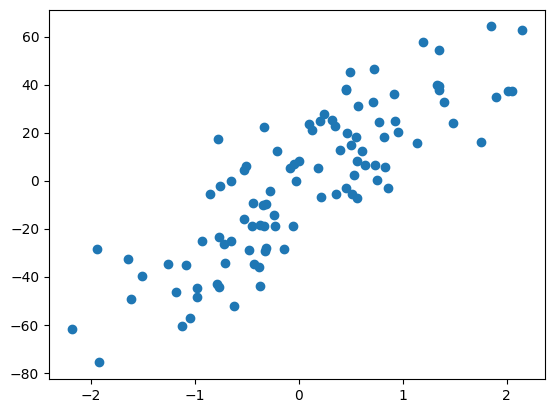

In [63]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [65]:
def call_loss(m, alpha):
    return np.sum((y-m*X.ravel() - 2.29)**2) + alpha*m*m

def predict(m):
    return m*X + 2.29

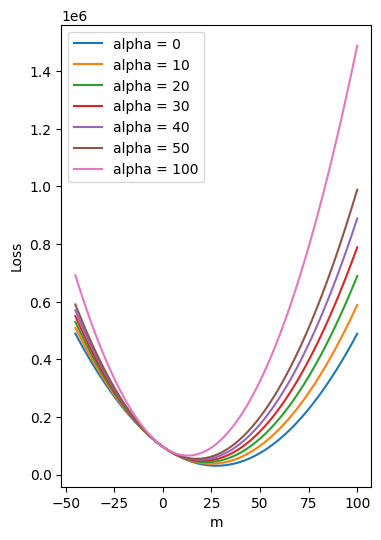

In [66]:
m = np.linspace(-45,100,100)

plt.figure(figsize=(4,6))

for j in [0,10,20,30,40,50,100]:
    loss = []
    
    for i in range(m.shape[0]):
        loss_i = call_loss(m[i],j)
        loss.append(loss_i)
        
    plt.plot(m,loss,label=f'alpha = {j}')
    
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()